# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scientific Notation values changed to Decimal Format
pd.options.display.float_format = '{:.1f}'.format

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Data Loading


In [ ]:

used_cars_dataset = pd.read_csv('/content/UsedCarsSA_Clean_EN.csv')
used_cars_dataset

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


# Initial Exploration of The Data (EDA) / Initial Inspection

In [ ]:
#Display column names
used_cars_dataset.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price', 'Negotiable'],
      dtype='object')

In [ ]:
#Display first five rows

used_cars_dataset.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


The dataset contains several columns such as

`Make`: The car manufacturer

`Type`: Model of the car

`Year`: Manufacturing year

`Origin`: Country of origin (Gulf / Saudi/ Other)

`Color`: Color of the car

`Options`": Feature level (e.g., Full, Standard, Semi Full)

`Engine_Size`: Engine Capacity in litres

`Fuel_Type`: Type of fuel (e.g., Gas, Diesel, Hybrid)

`Gear_Type`: Transimission type (e.g., Automatic, Manual)

`Region`: Region where the car is being sold

`Price`: Selling price

`Negotiable`: Whether price is negotiable or not


---



`Price` will be the target column for prediction



In [ ]:
#Display the no. of rows and columns
used_cars_dataset.shape

(8035, 13)

In [ ]:
#Display the numerical values statistics of the dataset
used_cars_dataset.describe()

,Year,Engine_Size,Mileage,Price
count,8035.0,8035.0,8035.0,8035.0
mean,2014.1,3.3,149148.8,53699.8
std,5.8,1.5,347448.0,71984.7
min,1963.0,1.0,100.0,0.0
25%,2012.0,2.0,37000.0,0.0
50%,2016.0,3.0,101960.0,37000.0
75%,2018.0,4.4,195000.0,73750.0
max,2022.0,9.0,20000000.0,1150000.0


NOTE:
25% of values in `Price` are zero; will be filtered later

Maximum value in `Mileage` is 20,000,000 which is unrealistic


In [ ]:
#Display meta-data of the dataset
used_cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [ ]:
#Display column data types
used_cars_dataset.dtypes

,0
Make,object
Type,object
Year,int64
Origin,object
Color,object
Options,object
Engine_Size,float64
Fuel_Type,object
Gear_Type,object
Mileage,int64


In [ ]:
used_cars_dataset.describe(include='object')

,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region
count,8035,8035,8035,8035,8035,8035,8035,8035
unique,59,381,4,15,3,3,2,27
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh
freq,2038,372,5962,3478,3193,7861,6971,3237


# Data Cleaning

Initially, checking if there are any duplicates in the dataset

In [ ]:
number_of_duplicates = sum(used_cars_dataset.duplicated())
number_of_duplicates

3

Remove all duplicates

In [ ]:
used_cars_dataset = used_cars_dataset.drop_duplicates()
number_of_duplicates = sum(used_cars_dataset.duplicated())
number_of_duplicates

0

Check for any null values in the used_cars_dataset

In [ ]:
used_cars_dataset.isnull().sum()

,0
Make,0
Type,0
Year,0
Origin,0
Color,0
Options,0
Engine_Size,0
Fuel_Type,0
Gear_Type,0
Mileage,0


Renaming columns for more clarity: Type to Model

In [ ]:
used_cars_dataset = used_cars_dataset.rename(columns = {'Type':'Model'})
used_cars_dataset.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


Check the rows where `Price` is set to 0 (ZERO)

In [ ]:
zeroed_prices = used_cars_dataset[used_cars_dataset['Price'] == 0]
zeroed_prices

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0,True
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0,True
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0,True
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0,True
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0,True
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0,True


In [ ]:
used_cars_dataset.describe(exclude="number")

,Make,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region,Negotiable
count,8032,8032,8032,8032,8032,8032,8032,8032,8032
unique,59,381,4,15,3,3,2,27,2
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh,False
freq,2037,372,5961,3477,3191,7858,6968,3236,5507


Remove rows where price is set to 0 (ZERO)

In [ ]:

used_cars_dataset = used_cars_dataset[used_cars_dataset['Price'] != 0]
used_cars_dataset.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False


`Negotiable` column is not needed anymore, as it was only True when `Price` = 0

In [ ]:

used_cars_dataset.drop('Negotiable', axis = 1, inplace = True)
used_cars_dataset.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000


In [ ]:
used_cars_dataset.describe()

,Year,Engine_Size,Mileage,Price
count,5506.0,5506.0,5506.0,5506.0
mean,2014.8,3.2,139379.9,78334.9
std,5.1,1.5,334933.0,75041.5
min,1963.0,1.0,100.0,1.0
25%,2013.0,2.0,46000.0,35000.0
50%,2016.0,2.7,101000.0,58000.0
75%,2018.0,4.0,180000.0,95000.0
max,2021.0,9.0,20000000.0,1150000.0


Sort the Prices in Ascending Order (lowest price to highest price)

In [ ]:
used_cars_dataset.sort_values(by = 'Price', ascending = True, inplace = True)
used_cars_dataset.head(15)

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884
7233,Toyota,Yaris,2019,Saudi,White,Standard,1.6,Gas,Automatic,85000,Najran,950
1661,MG,5,2020,Saudi,White,Standard,1.5,Gas,Automatic,41000,Al-Ahsa,988
7665,Hyundai,Elantra,2019,Saudi,Grey,Standard,2.0,Gas,Automatic,89000,Jeddah,993
3009,GMC,Yukon,2021,Saudi,Another Color,Standard,5.3,Gas,Automatic,4000,Jeddah,1000
4277,Toyota,Corolla,2020,Saudi,Silver,Standard,1.6,Gas,Automatic,48563,Hail,1002


`Price` results lower than 2000 SAR & `Mileage` values that go beyond 1,000,000 KM are unrealistic and potentially skew results

In [ ]:

used_cars_dataset = used_cars_dataset[(used_cars_dataset['Price']> 2000) & (used_cars_dataset['Mileage'] < 1000000)]
used_cars_dataset

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price
3974,Hyundai,Azera,2018,Saudi,Another Color,Standard,3.5,Gas,Automatic,147,Tabouk,2049
4710,Dodge,Charger,2019,Saudi,Another Color,Semi Full,3.6,Gas,Automatic,51000,Jubail,2069
7946,Toyota,Avalon,2019,Gulf Arabic,Grey,Standard,3.2,Gas,Automatic,44000,Riyadh,2093
7995,Jeep,Cherokee,2015,Saudi,Silver,Full,2.4,Gas,Automatic,180000,Taef,2122
3692,Kia,Carnival,2019,Gulf Arabic,White,Semi Full,3.6,Gas,Automatic,99000,Riyadh,2141
...,...,...,...,...,...,...,...,...,...,...,...,...
3182,Bentley,Arnage,2020,Saudi,Black,Standard,1.0,Gas,Automatic,300,Jeddah,772500
4038,Mercedes,G,2019,Other,Black,Full,4.0,Gas,Automatic,39000,Riyadh,800000
3826,Mercedes,G,2019,Saudi,Grey,Full,4.0,Gas,Automatic,60000,Riyadh,835000
5913,Bentley,Bentayga,2019,Saudi,Another Color,Full,6.0,Gas,Automatic,13000,Dammam,850000


# EDA

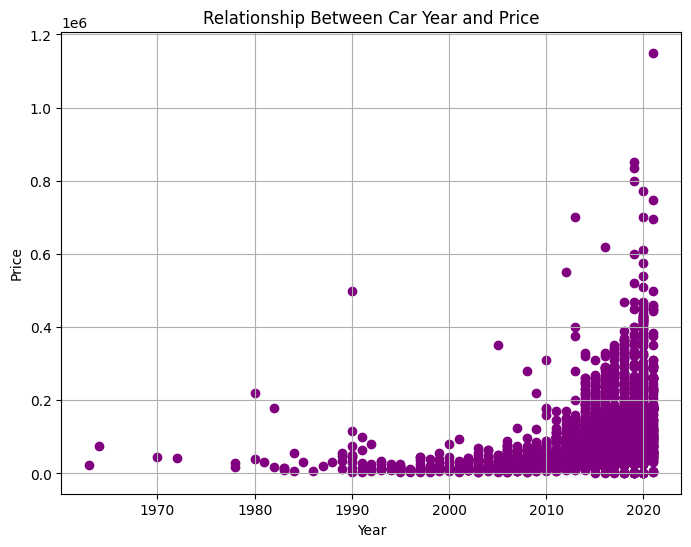

In [ ]:
#Scatterplot

plt.figure(figsize=(8, 6))
plt.scatter(used_cars_dataset.Year, used_cars_dataset.Price, color = 'Purple')
plt.title('Relationship Between Car Year and Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()
#as the age of the car increases, the price tends to decrease. This is an expected relationship as older cars typically depreciate in value


**Interpretations**: As the `Age` of the car increases, the `Price` tends to decrease. This is an expected relationship as newer cars typically are greater in value

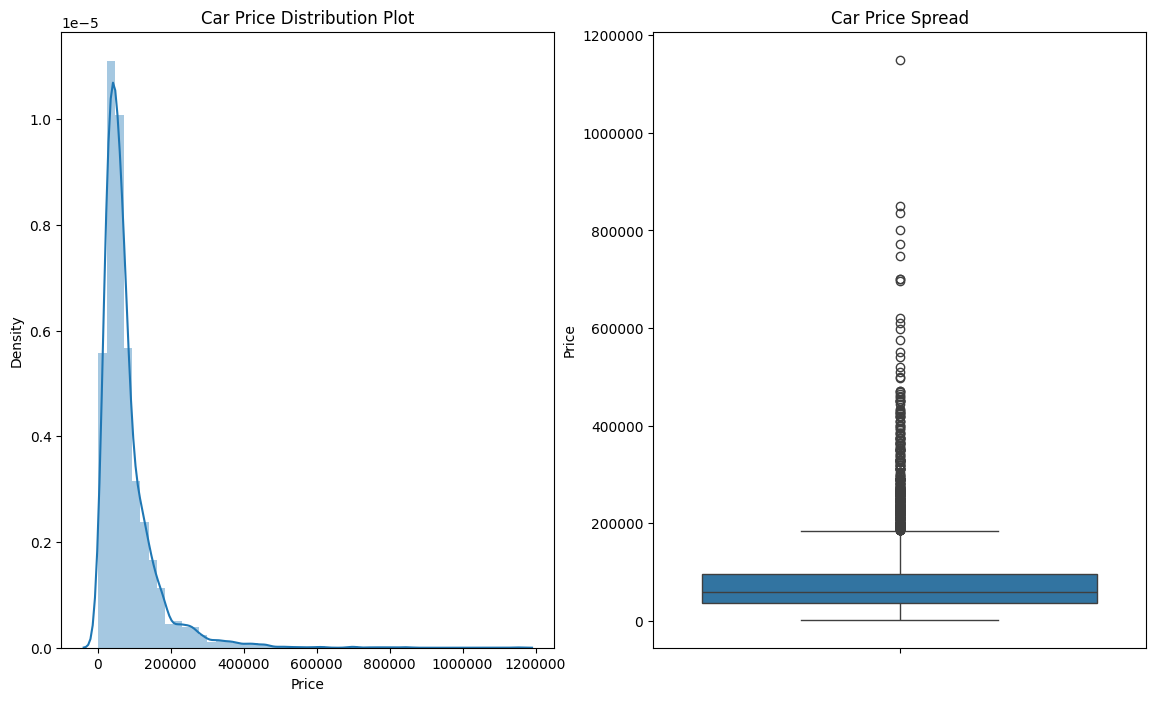

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(used_cars_dataset.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=used_cars_dataset.Price)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [ ]:
print(used_cars_dataset.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count      5420.0
mean      79428.5
std       75072.2
min        2049.0
25%       36000.0
50%       58000.0
75%       95000.0
85%      129000.0
90%      155000.0
100%    1150000.0
max     1150000.0
Name: Price, dtype: float64


Insights :

The plot seemed to be left-skewed, meaning that the most prices in the dataset are relatively low (Below 95,000).

There is a significant difference between the mean and the median of the price distribution.

The data points are far spread out from the mean, which indicates a high variance in the car prices. (85% of the prices are below 130,000, whereas the remaining 15% are between 130,000 and 1,150,000 SAR)

In [ ]:
categorical_columns = used_cars_dataset.select_dtypes(include=['object'])
categorical_columns.head()

,Make,Model,Origin,Color,Options,Fuel_Type,Gear_Type,Region
3974,Hyundai,Azera,Saudi,Another Color,Standard,Gas,Automatic,Tabouk
4710,Dodge,Charger,Saudi,Another Color,Semi Full,Gas,Automatic,Jubail
7946,Toyota,Avalon,Gulf Arabic,Grey,Standard,Gas,Automatic,Riyadh
7995,Jeep,Cherokee,Saudi,Silver,Full,Gas,Automatic,Taef
3692,Kia,Carnival,Gulf Arabic,White,Semi Full,Gas,Automatic,Riyadh


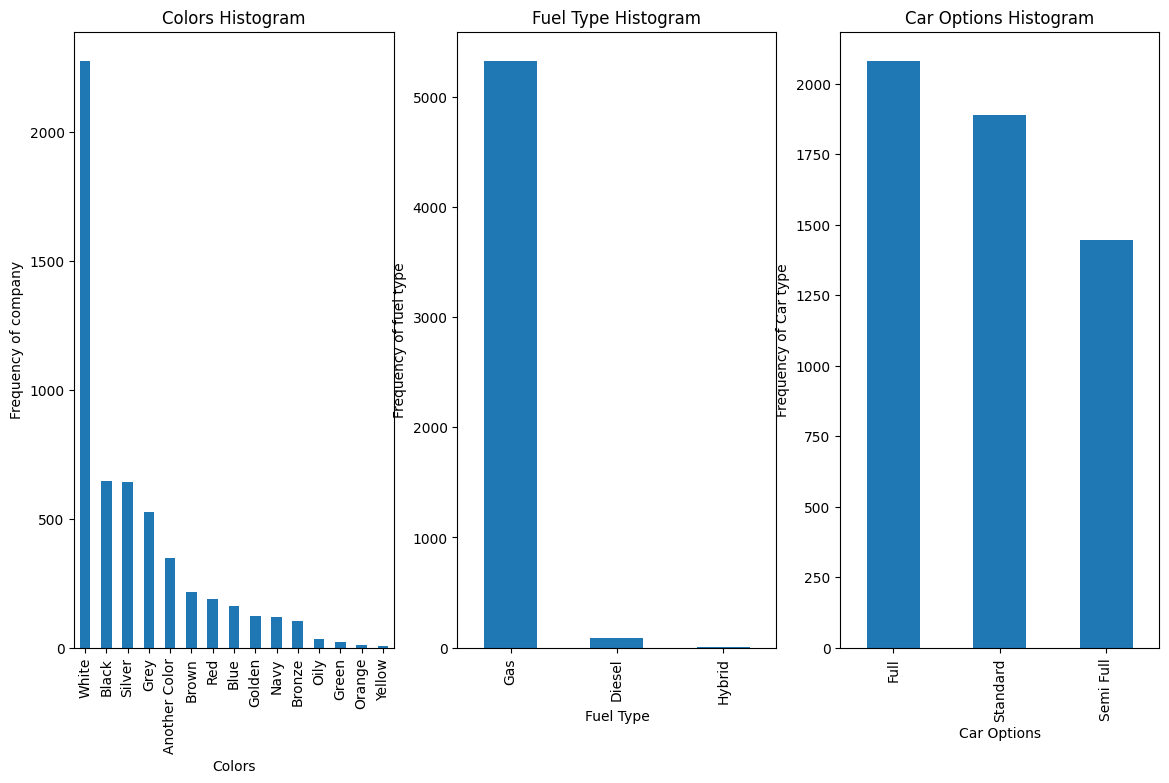

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
plt1 = used_cars_dataset.Color.value_counts().plot(kind='bar')
plt.title('Colors Histogram')
plt1.set(xlabel = 'Colors', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = used_cars_dataset.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = used_cars_dataset.Options.value_counts().plot(kind='bar')
plt.title('Car Options Histogram')
plt1.set(xlabel = 'Car Options', ylabel='Frequency of Car type')

plt.show()

Interpretations:

**White** is the most flavorable color for buyers.

Number of **Gas** fueled cars is very high compared to Diesel cars.

**Full Option** cars seems to be more preferable for car sales than other options.

Text(0, 0.5, 'Count of Cars')

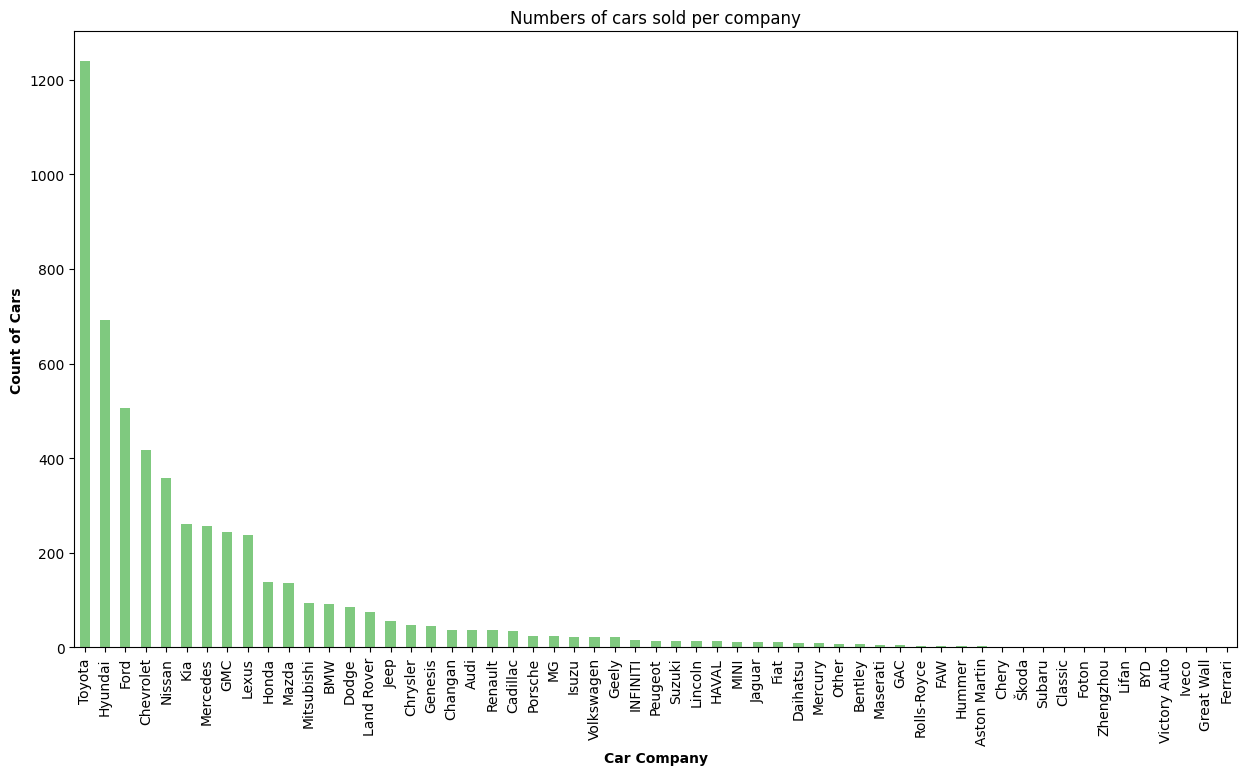

In [ ]:
# Visualizing the different car company names available

plt.rcParams['figure.figsize'] = [15,8]
ax = used_cars_dataset['Make'].value_counts().plot(kind='bar', colormap = 'Accent')
ax.title.set_text('Numbers of cars sold per company')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

Interpretations:

**Toyota**, **Hyundai**, and **Ford** are among the MOST cars sold as used cars.

**Ferrari**, **Great Wall**, and **Victory Auto** are the LEAST sold cars.

Correlation Heatmap of numeric values


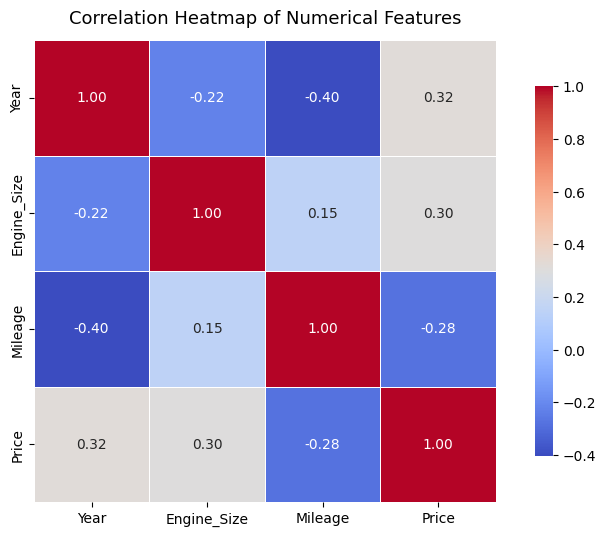

In [ ]:
correlation_matrix = used_cars_dataset.corr(numeric_only= True)
correlation_matrix
plt.figure(figsize= (10,6))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths= 0.5, cbar_kws={'shrink': 0.8}, square = True)
plt.title('Correlation Heatmap of Numerical Features', fontsize = 13, pad = 12)
plt.show()

 **Interpretations**: The heatmap above illustrates the relationships among the numerical features in the dataset. A negative correlation is observed between `Year` and `Mileage`, showing that older cars tend to have higher mileage. To add, `Mileage` has a negative correlation with `Price`, suggesting that heavily used cars are generally sold for lower prices. As for `Year` and `Engine_size` with positive corrlations with `Price`, suggesting that newer vehicles with larger engines are more expensive

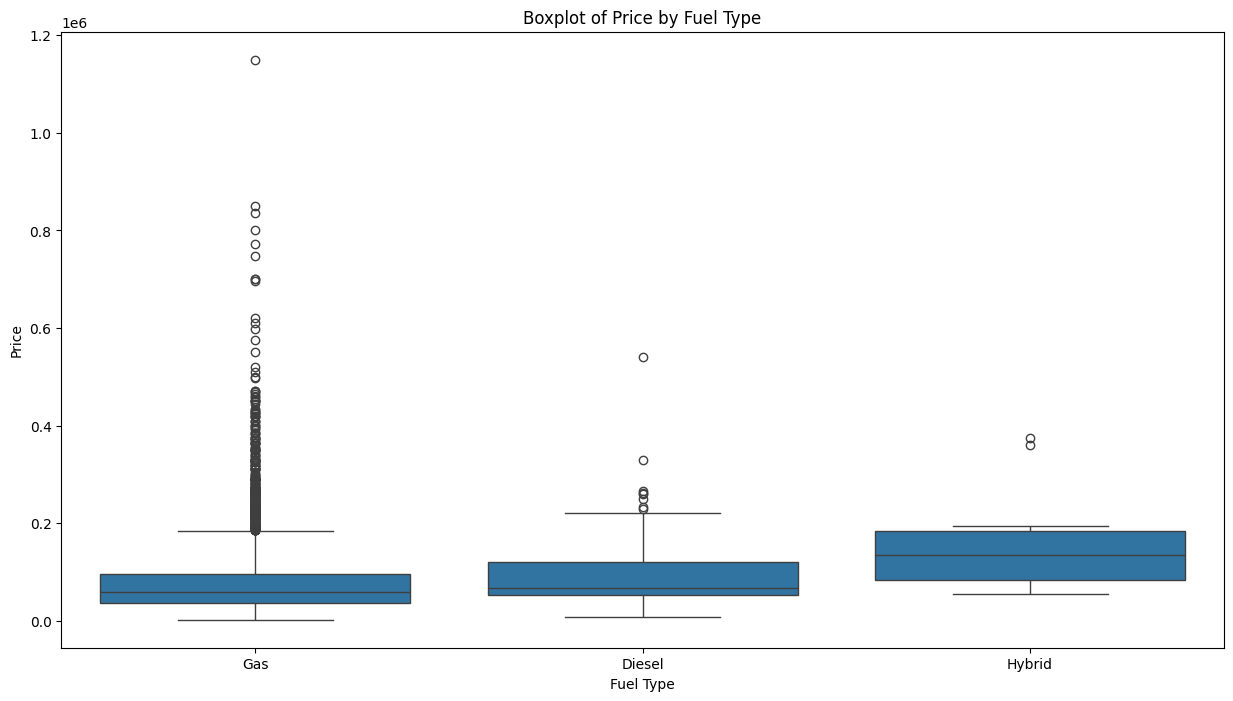

In [ ]:
sns.boxplot(x='Fuel_Type', y='Price', data=used_cars_dataset)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Boxplot of Price by Fuel Type')
plt.show()


 **Interpretations**:

# `Brand` vs `Price`

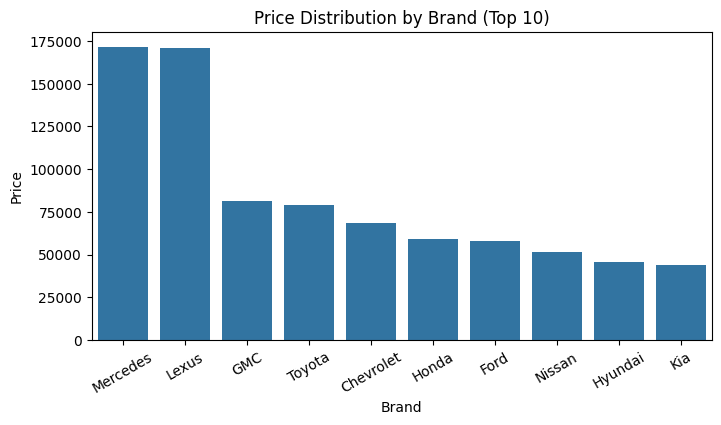

In [ ]:
top_brands = used_cars_dataset['Make'].value_counts().head(10).index
brand_avg = used_cars_dataset[used_cars_dataset['Make'].isin(top_brands)].groupby('Make')['Price'].mean().sort_values(ascending = False)

plt.figure(figsize = (8,4))
sns.barplot(x = brand_avg.index, y = brand_avg.values)
plt.xticks(rotation = 30 )
plt.title('Price Distribution by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

**Interpretation** : This visualization highlights the top 10 most common car brands and their corresponding average prices.
Luxury brands such as Mercedes and Lexus

# Feature Engineering

In [ ]:
used_cars_dataset['Car_Age'] = 2025 - used_cars_dataset['Year']
used_cars_dataset[['Year', 'Car_Age']].head(10)


,Year,Car_Age
3974,2018,7
4710,2019,6
7946,2019,6
7995,2015,10
3692,2019,6
4287,2020,5
1233,2018,7
3845,2020,5
5680,2016,9
3655,2019,6


In [ ]:
used_cars_dataset['Car_Age'].describe()
#to see if age is accurate, all cars are greater than 0 because all cars have been manufactred

,Car_Age
count,5420.0
mean,10.2
std,5.1
min,4.0
25%,7.0
50%,9.0
75%,12.0
max,62.0


In [ ]:
F=used_cars_dataset[['Mileage','Engine_Size','Price','Car_Age']].corr()
F

,Mileage,Engine_Size,Price,Car_Age
Mileage,1.0,0.1,-0.3,0.4
Engine_Size,0.1,1.0,0.3,0.2
Price,-0.3,0.3,1.0,-0.3
Car_Age,0.4,0.2,-0.3,1.0


<Axes: >

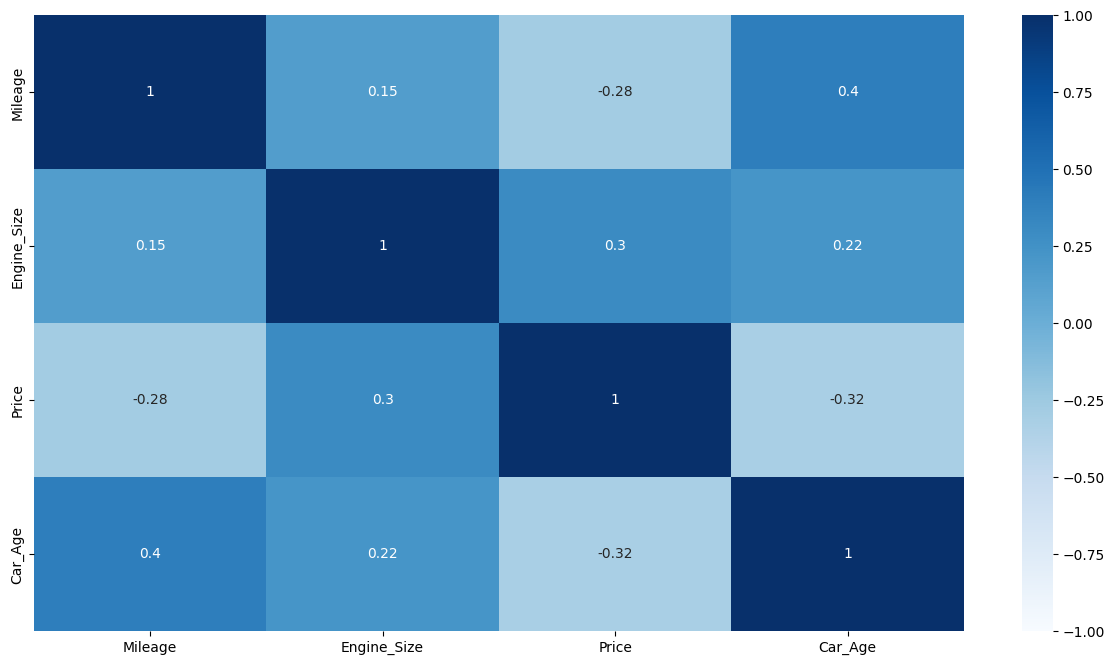

In [ ]:
sns.heatmap(data=F,annot=True,cmap='Blues',vmin=-1,vmax=1)


Interpretations: Heatmap displays that `Car_Age` and `Price` have a **negative** correlation and also `Mileage` and `Price`. Whereas `Engine_Size` and `Price` have a postive relationship.

Converting categorical variables into integers

In [ ]:
# Take only significant variables
significant_var = used_cars_dataset[['Make','Year', 'Color', 'Options','Engine_Size','Gear_Type','Mileage', 'Price']]

In [ ]:
significant_var


,Make,Year,Color,Options,Engine_Size,Gear_Type,Mileage,Price
3974,Hyundai,2018,Another Color,Standard,3.5,Automatic,147,2049
4710,Dodge,2019,Another Color,Semi Full,3.6,Automatic,51000,2069
7946,Toyota,2019,Grey,Standard,3.2,Automatic,44000,2093
7995,Jeep,2015,Silver,Full,2.4,Automatic,180000,2122
3692,Kia,2019,White,Semi Full,3.6,Automatic,99000,2141
...,...,...,...,...,...,...,...,...
3182,Bentley,2020,Black,Standard,1.0,Automatic,300,772500
4038,Mercedes,2019,Black,Full,4.0,Automatic,39000,800000
3826,Mercedes,2019,Grey,Full,4.0,Automatic,60000,835000
5913,Bentley,2019,Another Color,Full,6.0,Automatic,13000,850000


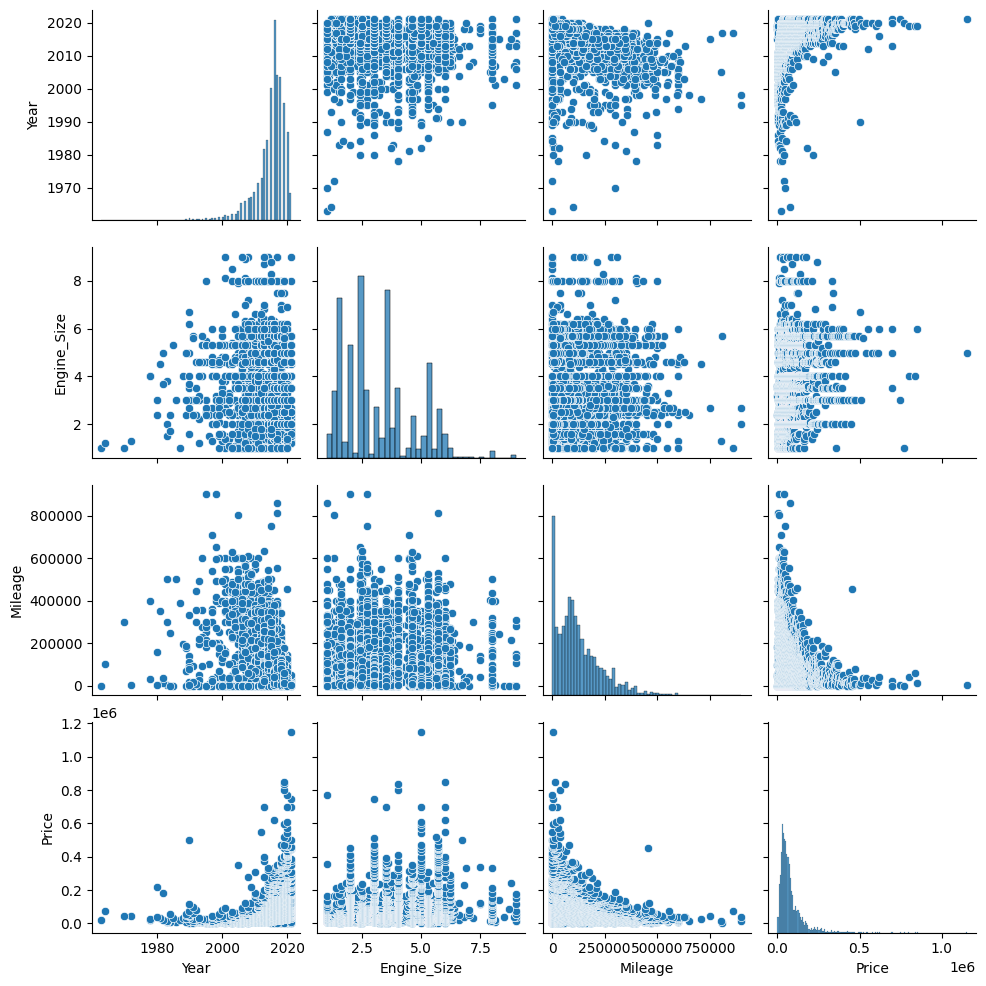

In [ ]:
# plot relationships in the dataset
sns.pairplot(significant_var)
plt.show()

To build our models we need to convert categorical values into integers using Dummy Variables

In [ ]:
categorical_val = ['Color', 'Options', 'Gear_Type', 'Make'] # Categorical Valiables

# Get the dummy variables for the categorical feature and store it in a new variable 'dummies'

dummies = pd.get_dummies(significant_var[categorical_val])
dummies.shape

(5420, 77)

In [ ]:
#Adding the results to the original dataframe

significant_var = pd.concat([significant_var, dummies], axis = 1)
significant_var.shape

(5420, 85)

In [ ]:
#Dropping the original categorical variables as dummies were created
significant_var.drop(categorical_val, axis = 1, inplace = True)
significant_var.shape

(5420, 81)

In [ ]:
significant_var.head()

,Year,Engine_Size,Mileage,Price,Color_Another Color,Color_Black,Color_Blue,Color_Bronze,Color_Brown,Color_Golden,...,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Victory Auto,Make_Volkswagen,Make_Zhengzhou,Make_Škoda
3974,2018,3.5,147,2049,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4710,2019,3.6,51000,2069,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7946,2019,3.2,44000,2093,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7995,2015,2.4,180000,2122,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3692,2019,3.6,99000,2141,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Model Building & Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Splitting data into **Training** and **Testing** sets

In [ ]:
from sklearn.model_selection import train_test_split

X= significant_var.drop(['Price'], axis =1)
y =significant_var['Price']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 55)


# Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
preds_lm_test = model.predict(X_test)


In [ ]:
print(r2_score(y_test, preds_lm_test))

0.6141363743580073


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Defining the model
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'squared_error')
reg_forest.fit(X_train, y_train) #Model Fitting

preds_forest_test = reg_forest.predict(X_test) #predict the price in test dataset

In [ ]:
from sklearn.metrics import r2_score
print(r2_score (y_test, preds_forest_test))

0.818107864102991


#


# Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
preds_dt_test = dt_model.predict(X_test)

print("Decision Tree Regressor model trained and predictions made.")

Decision Tree Regressor model trained and predictions made.


In [ ]:
print(r2_score(y_test, preds_dt_test))

0.6675971915785868


# Gradient Boosting Regressor Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
preds_gb_test = gb_model.predict(X_test)

print("Gradient Boosting Regressor model trained and predictions made.")

Gradient Boosting Regressor model trained and predictions made.


In [ ]:
print(r2_score(y_test, preds_gb_test))

0.8026116675237214


# K-Neighbors Regressor Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the KNeighborsRegressor model
kn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
kn_model.fit(X_train, y_train)

# Make predictions on the test set
preds_kn_test = kn_model.predict(X_test)

print("K-Neighbors Regressor model trained and predictions made.")

K-Neighbors Regressor model trained and predictions made.


In [ ]:
print(r2_score(y_test, preds_kn_test))

0.1257101731671385


#Model Evaluation and Interpretation

Model Evaluation Summary:


,Model,R2_Score,MAE,RMSE
1,Random Forest,0.8,15376.4,28962.4
3,Gradient Boosting,0.8,18034.4,30170.9
2,Decision Tree,0.7,20660.9,39152.5
0,Linear Regression,0.6,26248.2,42183.6
4,K-Neighbors,0.1,41316.7,63497.2


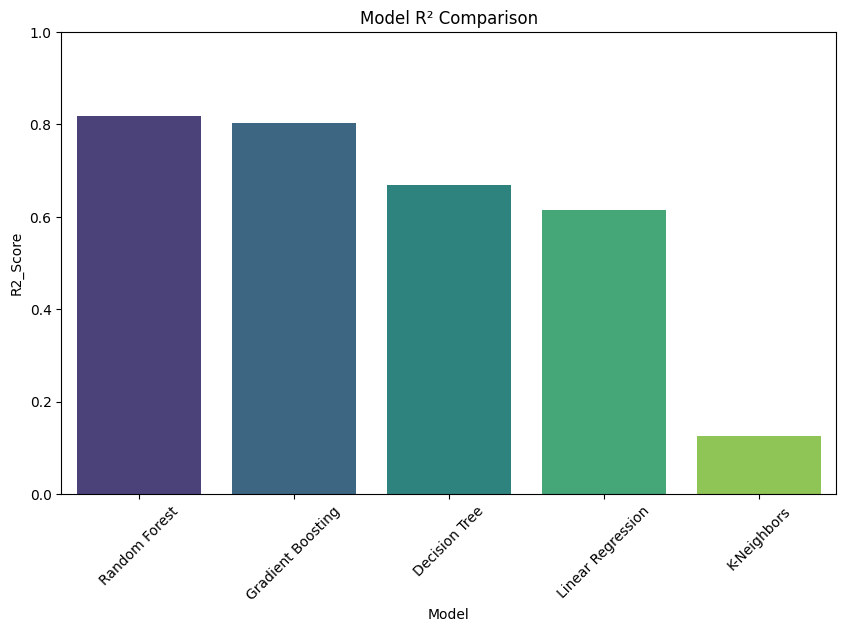


Best model based on R²: Random Forest


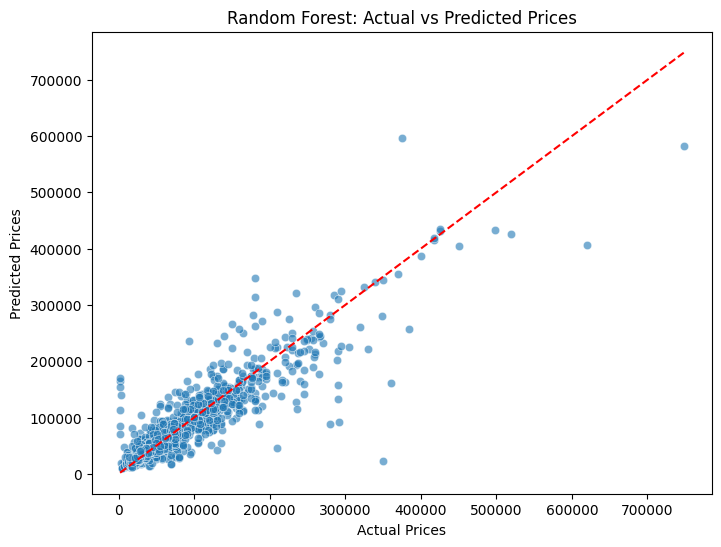

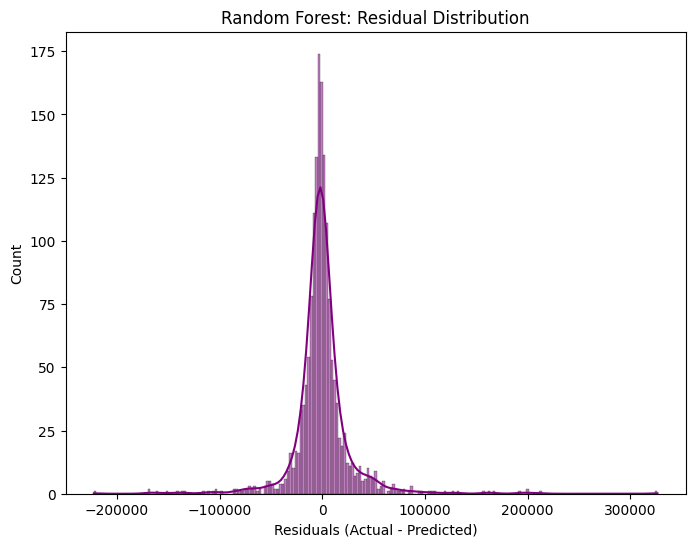

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics for all models
metrics = []
models = {
    'Linear Regression': preds_lm_test,
    'Random Forest': preds_forest_test,
    'Decision Tree': preds_dt_test,
    'Gradient Boosting': preds_gb_test,
    'K-Neighbors': preds_kn_test
}

for name, preds in models.items():
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    metrics.append([name, r2, mae, rmse])

metrics_df = pd.DataFrame(metrics, columns=['Model', 'R2_Score', 'MAE', 'RMSE'])
metrics_df = metrics_df.sort_values(by='R2_Score', ascending=False)

print("Model Evaluation Summary:")
display(metrics_df)

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df, x='Model', y='R2_Score', palette='viridis')
plt.title('Model R² Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Predicted vs Actual Visualization

best_model_name = metrics_df.iloc[0]['Model']
print(f"\nBest model based on R²: {best_model_name}")

best_preds = models[best_model_name]

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=best_preds, alpha=0.6)
plt.title(f'{best_model_name}: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Residual Plot
residuals = y_test - best_preds
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple')
plt.title(f'{best_model_name}: Residual Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.show()



# Feature Importance (for tree-based models)

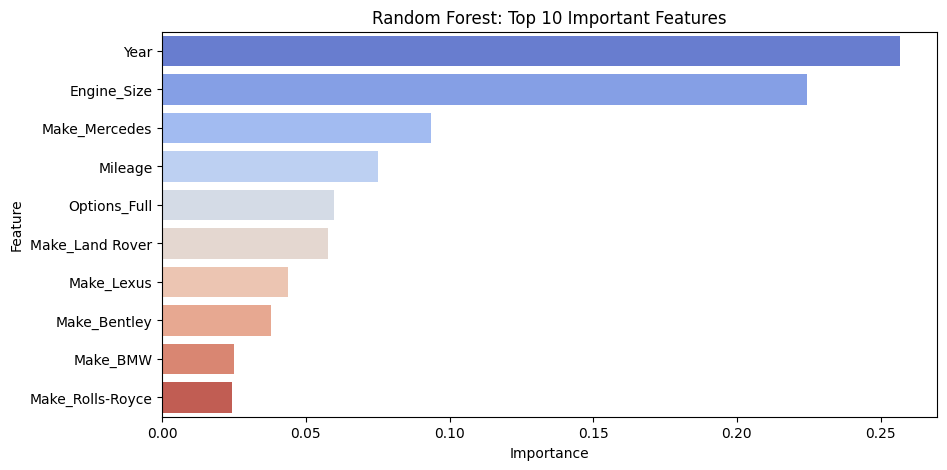

In [ ]:

if best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
    best_tree_model = reg_forest if best_model_name == 'Random Forest' else gb_model if best_model_name == 'Gradient Boosting' else dt_model
    importances = best_tree_model.feature_importances_
    feature_names = X_train.columns
    feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)

    plt.figure(figsize=(10,5))
    sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='coolwarm')
    plt.title(f'{best_model_name}: Top 10 Important Features')
    plt.show()


Model Performance (R-squared Score):
               Model  R-squared Score
1      Random Forest              0.8
3  Gradient Boosting              0.8
2      Decision Tree              0.7
0  Linear Regression              0.6
4        K-Neighbors              0.1


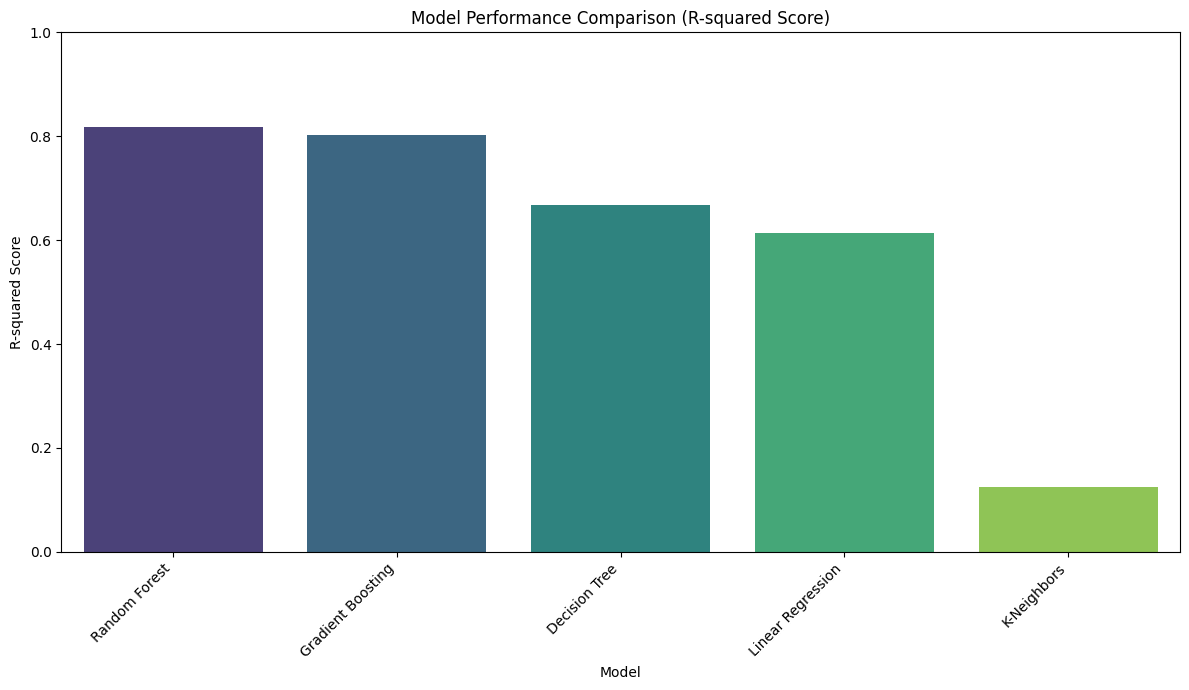

In [ ]:
r2_scores = {
    'Linear Regression': r2_score(y_test, preds_lm_test),
    'Random Forest': r2_score(y_test, preds_forest_test),
    'Decision Tree': r2_score(y_test, preds_dt_test),
    'Gradient Boosting': r2_score(y_test, preds_gb_test),
    'K-Neighbors': r2_score(y_test, preds_kn_test)
}

performance_df = pd.DataFrame(r2_scores.items(), columns=['Model', 'R-squared Score'])
performance_df = performance_df.sort_values(by='R-squared Score', ascending=False)

print("Model Performance (R-squared Score):")
print(performance_df)

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='R-squared Score', data=performance_df, palette='viridis')
plt.title('Model Performance Comparison (R-squared Score)')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1) # R-squared scores typically range from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Hybrid (Ensemble) Modeling for Innovation

Combining our two best models:

*   **Random Forest**
*   **Gradient Boosting**





Hybrid Model R²: 0.8274
Hybrid Model RMSE: 28216.67

 Model Comparison (Including Hybrid):


,Model,R2_Score,MAE,RMSE
5,Hybrid (RF + GB),0.8,15554.1,28216.7
0,Random Forest,0.8,15376.4,28962.4
1,Gradient Boosting,0.8,18034.4,30170.9
2,Decision Tree,0.7,20660.9,39152.5
3,Linear Regression,0.6,26248.2,42183.6
4,K-Neighbors,0.1,41316.7,63497.2


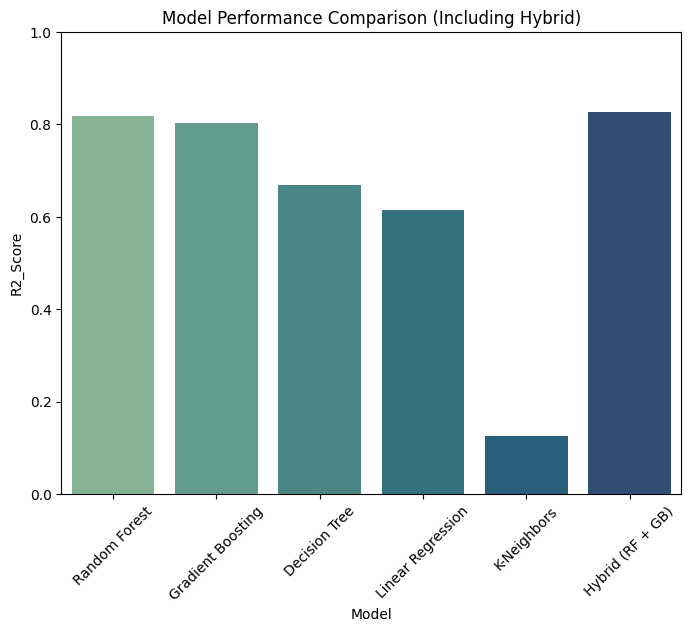

In [ ]:

# Weighted averaging ensemble

# Refit both models on training data (if not already fitted)
reg_forest.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Get predictions from both
pred_rf = reg_forest.predict(X_test)
pred_gb = gb_model.predict(X_test)

# Weighted hybrid prediction (e.g., 60% RF + 40% GB)
hybrid_preds = (0.6 * pred_rf) + (0.4 * pred_gb)

# Evaluate hybrid performance
hybrid_r2 = r2_score(y_test, hybrid_preds)
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_preds))

print(f"Hybrid Model R²: {hybrid_r2:.4f}")
print(f"Hybrid Model RMSE: {hybrid_rmse:.2f}")

# Compare with previous best
print("\n Model Comparison (Including Hybrid):")
updated_df = pd.concat([
    metrics_df,
    pd.DataFrame({
        'Model': ['Hybrid (RF + GB)'] ,
        'R2_Score': [hybrid_r2],
        'MAE': [mean_absolute_error(y_test, hybrid_preds)],
        'RMSE': [hybrid_rmse]
    })
], ignore_index=True)

display(updated_df.sort_values(by='R2_Score', ascending=False))

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='R2_Score', data=updated_df, palette='crest')
plt.title('Model Performance Comparison (Including Hybrid)')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()


## Streamlit and App Deployment

In [ ]:
#import joblib

#categorical_val = ['Color', 'Options', 'Gear_Type', 'Make']

# Recreate the original significant_var
#significant_var_original = used_cars_dataset[['Make','Year','Color','Options',
   #                                           'Engine_Size','Gear_Type','Mileage','Price']]

# Create dummy variables exactly like training
#dummies_rebuilt = pd.get_dummies(significant_var_original[categorical_val], drop_first=False)

# Drop original categorical columns
#significant_var_rebuilt = significant_var_original.drop(categorical_val, axis=1)

# Add the dummy columns back in
#significant_var_rebuilt = pd.concat([significant_var_rebuilt, dummies_rebuilt], axis=1)

# This is the REAL X the Random Forest was trained on
#X_real = significant_var_rebuilt.drop("Price", axis=1)

# Save the correct set of 80 column names
#joblib.dump(X_real.columns.tolist(), "model_columns.pkl")
